In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sb

In [ ]:
os.chdir('/content/drive/MyDrive/Time Series')

In [ ]:
df = pd.read_csv('us_airline_carrier_passenger.csv')

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [ ]:
df['month'] = pd.to_datetime(df['month'])

In [ ]:
import datetime

In [ ]:
train1 = df[df['month'] <= datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]
test1 = df[df['month'] > datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]

In [ ]:
train = df[df['month'] <= datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]
test = df[df['month'] > datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]

In [ ]:
train.set_index('month', inplace = True)
test.set_index('month', inplace = True)

In [ ]:
test.head()

,passengers
month,
2017-01-01,62621
2017-02-01,58377
2017-03-01,72962
2017-04-01,70262
2017-05-01,73679


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

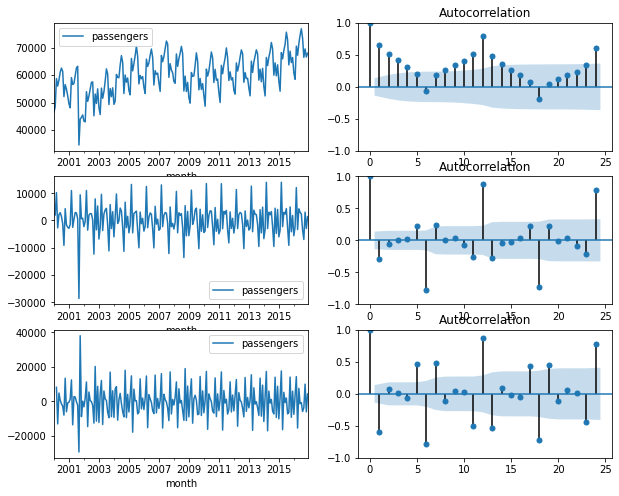

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (10,8))
fig = train.plot(kind = 'line', ax = ax[0,0])
fig = plot_acf(train.dropna(), ax = ax[0,1])

fig = train.diff().plot(kind = 'line', ax = ax[1,0])
fig = plot_acf(train.diff().dropna(), ax = ax[1,1])


fig = train.diff().diff().plot(kind = 'line', ax = ax[2,0])
fig = plot_acf(train.diff().diff().dropna(), ax = ax[2,1])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


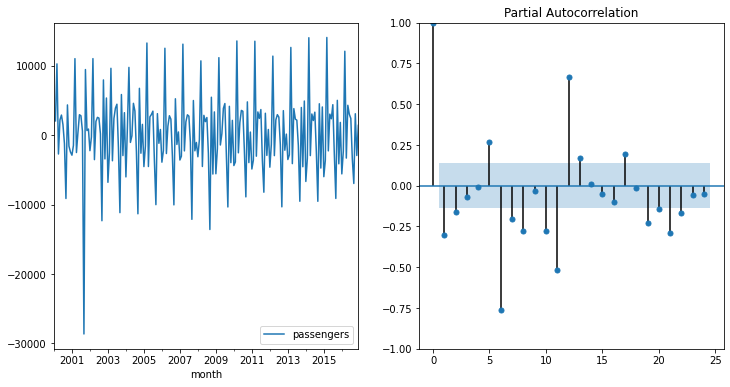

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
fig = train.diff().plot(kind = 'line', ax = ax[0])
fig = plot_pacf(train.diff().dropna(), ax = ax[1])

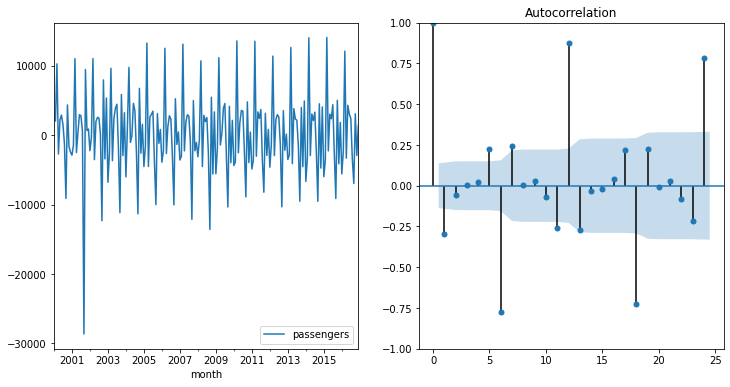

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
fig = train.diff().plot(kind = 'line', ax = ax[0])
fig = plot_acf(train.diff().dropna(), ax = ax[1])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
! pip3 install --upgrade statsmodels

In [ ]:
model = ARIMA(train.diff(), order=(6,0,6)).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  204
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -1880.930
Date:                Wed, 06 Oct 2021   AIC                           3789.860
Time:                        16:59:35   BIC                           3836.314
Sample:                    01-01-2000   HQIC                          3808.652
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.8662    218.651      0.484      0.628    -322.683     534.415
ar.L1         -0.0062      0.024     -0.256      0.798      -0.054       0.041
ar.L2          0.0044      0.030      0.144      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
residual = pd.DataFrame(model.resid)

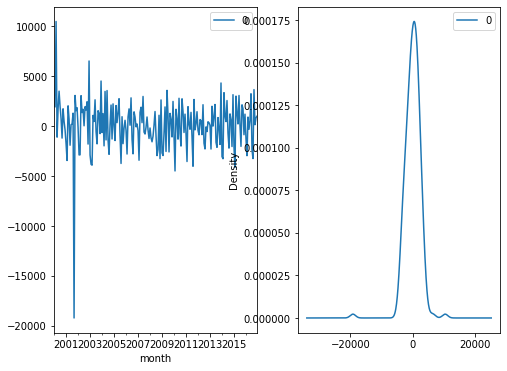

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8,6))
fig = residual.plot(kind = 'line', ax = ax[0])
fig = residual.plot(kind = 'kde', ax = ax[1])

In [ ]:
val = model.forecast(36, alpha = 0.05)

In [ ]:
val

2017-01-01    -4343.287233
2017-02-01     -285.101986
2017-03-01    10125.092123
2017-04-01    -3048.365221
2017-05-01     3679.764979
2017-06-01     -349.145730
2017-07-01     4619.785275
2017-08-01      574.695622
2017-09-01    -9734.011568
2017-10-01     3332.480075
2017-11-01    -3418.203588
2017-12-01      628.382862
2018-01-01    -4468.211110
2018-02-01     -435.181018
2018-03-01     9771.403694
2018-04-01    -3189.779101
2018-05-01     3580.501438
2018-06-01     -485.473543
2018-07-01     4735.738003
2018-08-01      713.718357
2018-09-01    -9390.194568
2018-10-01     3467.225901
2018-11-01    -3319.818667
2018-12-01      767.163155
2019-01-01    -4575.669914
2019-02-01     -563.601965
2019-03-01     9437.170888
2019-04-01    -3317.928896
2019-05-01     3483.166311
2019-06-01     -626.348299
2019-07-01     4835.160316
2019-08-01      831.978900
2019-09-01    -9065.261637
2019-10-01     3588.859475
2019-11-01    -3223.688253
2019-12-01      909.794879
Freq: MS, Name: predicted_me

In [ ]:
predicted = model.predict(start = (datetime.datetime.strptime('2017-01-01','%Y-%m-%d')), end = (datetime.datetime.strptime('2019-12-01','%Y-%m-%d')))

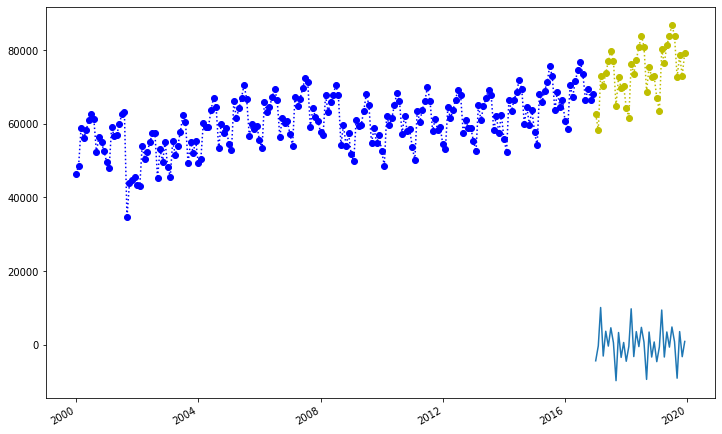

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['month'], train1['passengers'], 'bo:')
plt.plot(test1['month'], test1['passengers'], 'yo:')
predicted.plot(kind = 'line')
plt.show()

In [ ]:
train.iloc[-1]

passengers    67983
Name: 2016-12-01 00:00:00, dtype: int64

In [ ]:
forcast = 67983 + np.cumsum(predicted)
val1 = forcast.values
test1['forecast'] = val1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test1.head()

,month,passengers,forecast
204,2017-01-01,62621,63639.712767
205,2017-02-01,58377,63354.610781
206,2017-03-01,72962,73479.702904
207,2017-04-01,70262,70431.337683
208,2017-05-01,73679,74111.102662


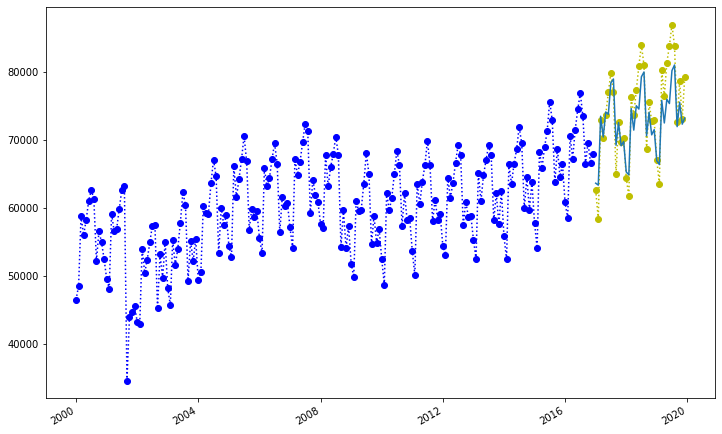

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['month'], train1['passengers'], 'bo:')
plt.plot(test1['month'], test1['passengers'], 'yo:')
forcast.plot(kind = 'line')
plt.show()

In [ ]:
train1.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [ ]:
train1.tail()

,month,passengers
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [ ]:
predicted1 = model.predict(start = (datetime.datetime.strptime('2000-01-01','%Y-%m-%d')), end = (datetime.datetime.strptime('2016-12-01','%Y-%m-%d')))

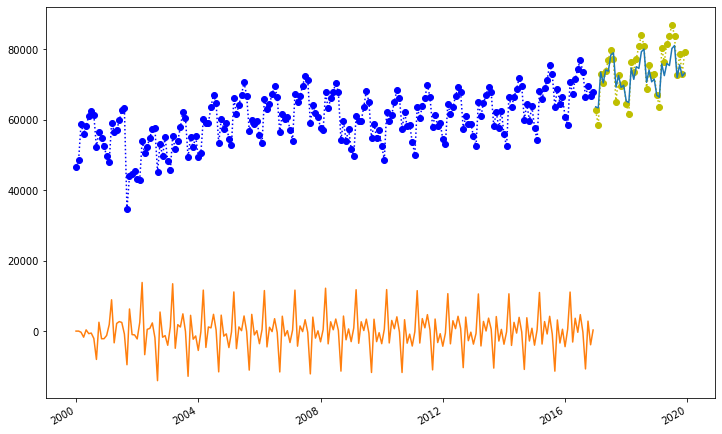

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['month'], train1['passengers'], 'bo:')
plt.plot(test1['month'], test1['passengers'], 'yo:')
forcast.plot(kind = 'line')
predicted1.plot(kind = 'line')
plt.show()

In [ ]:
forcast1 = 46492 + np.cumsum(predicted1)
val = forcast1.values
train1['forecast'] = val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train1.head()

,month,passengers,forecast
0,2000-01-01,46492,46597.866204
1,2000-02-01,48526,46703.732408
2,2000-03-01,58764,46485.989477
3,2000-04-01,56033,44870.999547
4,2000-05-01,58201,45321.953477


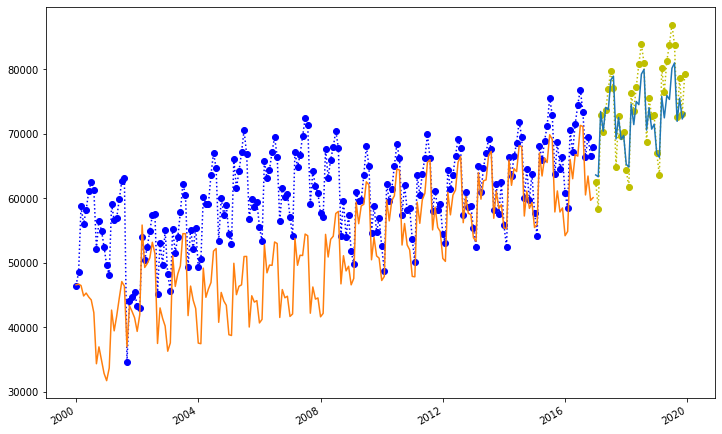

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['month'], train1['passengers'], 'bo:')
plt.plot(test1['month'], test1['passengers'], 'yo:')
forcast.plot(kind = 'line')
forcast1.plot(kind = 'line')
plt.show()

In [ ]:
error = train1['passengers'] - train1['forecast']
error

0       -105.866204
1       1822.267592
2      12278.010523
3      11162.000453
4      12879.046523
           ...     
199     2301.791260
200     5940.614901
201     6068.768489
202     6888.965617
203     7865.853055
Length: 204, dtype: float64

In [ ]:
se = error.std()
me = 1.96 * se
me

12028.145624623048

In [ ]:
upper = test1['forecast'] + me
lower = test1['forecast'] - me

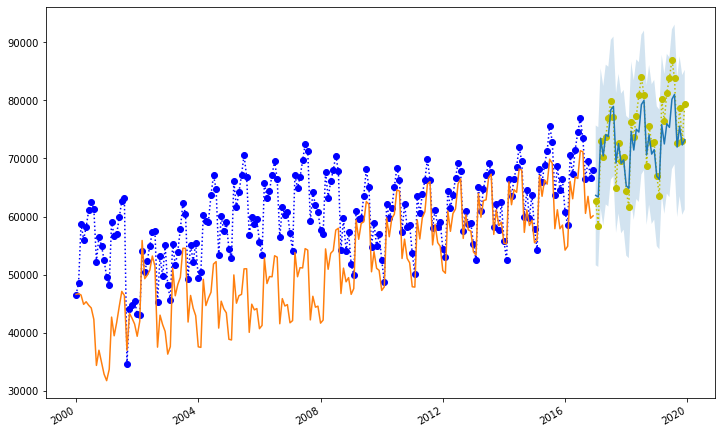

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['month'], train1['passengers'], 'bo:')
plt.plot(test1['month'], test1['passengers'], 'yo:')
forcast.plot(kind = 'line')
forcast1.plot(kind = 'line')
plt.fill_between(test1['month'], (upper), (lower), alpha = 0.2)
plt.show()